In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [8]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')
data = df_train.append(df_test)

In [4]:
df_test

Airline 
 Date_of_Journey 
 Source 
 Destination 
 Route 
 Dep_Time 
 Arrival_Time 
 Duration 
 Total_Stops 
 Additional_Info 
 
 
 
 
 0 
 Jet Airways 
 6/06/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 17:30 
 04:25 07 Jun 
 10h 55m 
 1 stop 
 No info 
 
 
 1 
 IndiGo 
 12/05/2019 
 Kolkata 
 Banglore 
 CCU → MAA → BLR 
 06:20 
 10:20 
 4h 
 1 stop 
 No info 
 
 
 2 
 Jet Airways 
 21/05/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 19:15 
 19:00 22 May 
 23h 45m 
 1 stop 
 In-flight meal not included 
 
 
 3 
 Multiple carriers 
 21/05/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 08:00 
 21:00 
 13h 
 1 stop 
 No info 
 
 
 4 
 Air Asia 
 24/06/2019 
 Banglore 
 Delhi 
 BLR → DEL 
 23:55 
 02:45 25 Jun 
 2h 50m 
 non-stop 
 No info 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2666 
 Air India 
 6/06/2019 
 Kolkata 
 Banglore 
 CCU → DEL → BLR 
 20:30 
 20:25 07 Jun 
 23h 55m 
 1 stop 
 No info 
 
 
 2667 
 IndiGo 
 27/03/2019 
 Kolkata 
 Banglore 
 CCU → BLR 
 14:20 
 16:55 
 2h 35m 
 non-stop 
 No info 
 
 
 2668 
 Jet Airways 
 6/03/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 21:50 
 04:25 07 Mar 
 6h 35m 
 1 stop 
 No info 
 
 
 2669 
 Air India 
 6/03/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 04:00 
 19:15 
 15h 15m 
 1 stop 
 No info 
 
 
 2670 
 Multiple carriers 
 15/06/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 04:55 
 19:15 
 14h 20m 
 1 stop 
 No info 
 
 
 
 2671 rows × 10 columns

In [5]:
df_train

Airline 
 Date_of_Journey 
 Source 
 Destination 
 Route 
 Dep_Time 
 Arrival_Time 
 Duration 
 Total_Stops 
 Additional_Info 
 Price 
 
 
 
 
 0 
 IndiGo 
 24/03/2019 
 Banglore 
 New Delhi 
 BLR → DEL 
 22:20 
 01:10 22 Mar 
 2h 50m 
 non-stop 
 No info 
 3897 
 
 
 1 
 Air India 
 1/05/2019 
 Kolkata 
 Banglore 
 CCU → IXR → BBI → BLR 
 05:50 
 13:15 
 7h 25m 
 2 stops 
 No info 
 7662 
 
 
 2 
 Jet Airways 
 9/06/2019 
 Delhi 
 Cochin 
 DEL → LKO → BOM → COK 
 09:25 
 04:25 10 Jun 
 19h 
 2 stops 
 No info 
 13882 
 
 
 3 
 IndiGo 
 12/05/2019 
 Kolkata 
 Banglore 
 CCU → NAG → BLR 
 18:05 
 23:30 
 5h 25m 
 1 stop 
 No info 
 6218 
 
 
 4 
 IndiGo 
 01/03/2019 
 Banglore 
 New Delhi 
 BLR → NAG → DEL 
 16:50 
 21:35 
 4h 45m 
 1 stop 
 No info 
 13302 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 10678 
 Air Asia 
 9/04/2019 
 Kolkata 
 Banglore 
 CCU → BLR 
 19:55 
 22:25 
 2h 30m 
 non-stop 
 No info 
 4107 
 
 
 10679 
 Air India 
 27/04/2019 
 Kolkata 
 Banglore 
 CCU → BLR 
 20:45 
 23:20 
 2h 35m 
 non-stop 
 No info 
 4145 
 
 
 10680 
 Jet Airways 
 27/04/2019 
 Banglore 
 Delhi 
 BLR → DEL 
 08:20 
 11:20 
 3h 
 non-stop 
 No info 
 7229 
 
 
 10681 
 Vistara 
 01/03/2019 
 Banglore 
 New Delhi 
 BLR → DEL 
 11:30 
 14:10 
 2h 40m 
 non-stop 
 No info 
 12648 
 
 
 10682 
 Air India 
 9/05/2019 
 Delhi 
 Cochin 
 DEL → GOI → BOM → COK 
 10:55 
 19:15 
 8h 20m 
 2 stops 
 No info 
 11753 
 
 
 
 10683 rows × 11 columns

In [6]:
data

Airline 
 Date_of_Journey 
 Source 
 Destination 
 Route 
 Dep_Time 
 Arrival_Time 
 Duration 
 Total_Stops 
 Additional_Info 
 Price 
 
 
 
 
 0 
 IndiGo 
 24/03/2019 
 Banglore 
 New Delhi 
 BLR → DEL 
 22:20 
 01:10 22 Mar 
 2h 50m 
 non-stop 
 No info 
 3897.0 
 
 
 1 
 Air India 
 1/05/2019 
 Kolkata 
 Banglore 
 CCU → IXR → BBI → BLR 
 05:50 
 13:15 
 7h 25m 
 2 stops 
 No info 
 7662.0 
 
 
 2 
 Jet Airways 
 9/06/2019 
 Delhi 
 Cochin 
 DEL → LKO → BOM → COK 
 09:25 
 04:25 10 Jun 
 19h 
 2 stops 
 No info 
 13882.0 
 
 
 3 
 IndiGo 
 12/05/2019 
 Kolkata 
 Banglore 
 CCU → NAG → BLR 
 18:05 
 23:30 
 5h 25m 
 1 stop 
 No info 
 6218.0 
 
 
 4 
 IndiGo 
 01/03/2019 
 Banglore 
 New Delhi 
 BLR → NAG → DEL 
 16:50 
 21:35 
 4h 45m 
 1 stop 
 No info 
 13302.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2666 
 Air India 
 6/06/2019 
 Kolkata 
 Banglore 
 CCU → DEL → BLR 
 20:30 
 20:25 07 Jun 
 23h 55m 
 1 stop 
 No info 
 NaN 
 
 
 2667 
 IndiGo 
 27/03/2019 
 Kolkata 
 Banglore 
 CCU → BLR 
 14:20 
 16:55 
 2h 35m 
 non-stop 
 No info 
 NaN 
 
 
 2668 
 Jet Airways 
 6/03/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 21:50 
 04:25 07 Mar 
 6h 35m 
 1 stop 
 No info 
 NaN 
 
 
 2669 
 Air India 
 6/03/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 04:00 
 19:15 
 15h 15m 
 1 stop 
 No info 
 NaN 
 
 
 2670 
 Multiple carriers 
 15/06/2019 
 Delhi 
 Cochin 
 DEL → BOM → COK 
 04:55 
 19:15 
 14h 20m 
 1 stop 
 No info 
 NaN 
 
 
 
 13354 rows × 11 columns

In [9]:
# Preprocess the data
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
data['Journey_Day'] = data['Date_of_Journey'].dt.day
data['Journey_Month'] = data['Date_of_Journey'].dt.month
data.drop('Date_of_Journey', axis=1, inplace=True)

In [10]:
for column in ['Dep_Time', 'Arrival_Time']:
    data[column + '_Hour'] = pd.to_datetime(data[column]).dt.hour
    data[column + '_Minute'] = pd.to_datetime(data[column]).dt.minute
    data.drop(column, axis=1, inplace=True)


In [ ]:
data['Duration'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [11]:
# Encode categorical variables
cat_columns = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']
encoder = LabelEncoder()
for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

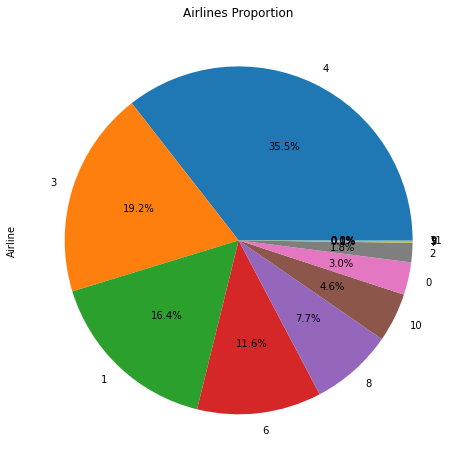

In [18]:
# Visualizations
# 1. Pie chart for Airlines proportion
plt.figure(figsize=(10, 8))
data['Airline'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Airlines Proportion')
plt.show()

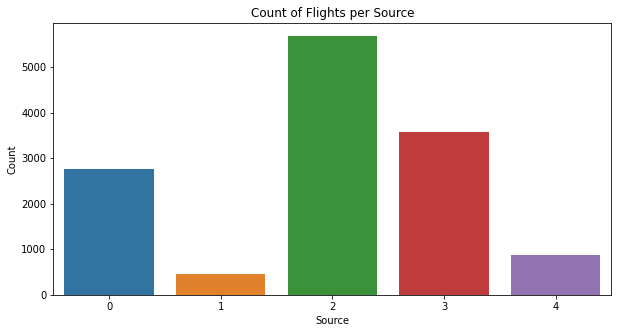

In [19]:
# 2. Countplot for Source
plt.figure(figsize=(10, 5))
sns.countplot(x='Source', data=data)
plt.title('Count of Flights per Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()

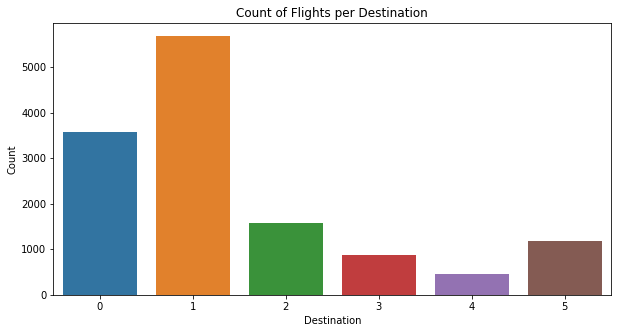

In [20]:
# 3. Countplot for Destination
plt.figure(figsize=(10, 5))
sns.countplot(x='Destination', data=data)
plt.title('Count of Flights per Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

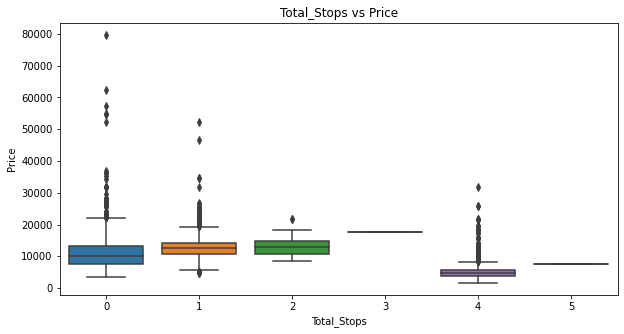

In [21]:
# 4. Box plot for Total_Stops vs Price
plt.figure(figsize=(10, 5))
sns.boxplot(x='Total_Stops', y='Price', data=data)
plt.title('Total_Stops vs Price')
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.show()

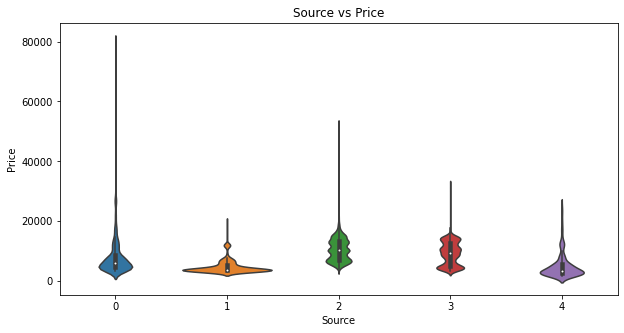

In [22]:
# 5. Violin plot for Source vs Price
plt.figure(figsize=(10, 5))
sns.violinplot(x='Source', y='Price', data=data)
plt.title('Source vs Price')
plt.xlabel('Source')
plt.ylabel('Price')
plt.show()

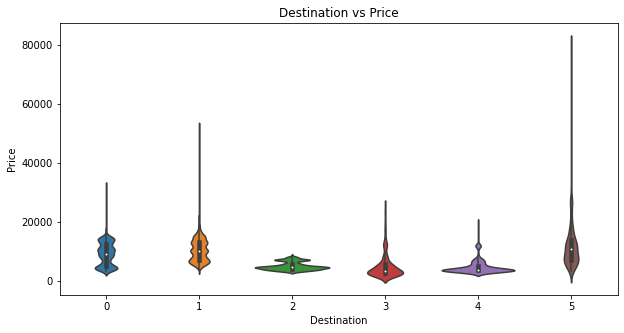

In [23]:

# 6. Violin plot for Destination vs Price
plt.figure(figsize=(10, 5))
sns.violinplot(x='Destination', y='Price', data=data)
plt.title('Destination vs Price')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.show()

In [12]:
# Split the data back into training and testing sets
train_data = data[:len(df_train)]
test_data = data[len(df_train):]

In [13]:
X_train = train_data.drop('Price', axis=1)
y_train = train_data['Price']
X_test = test_data.drop('Price', axis=1)

In [14]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# Make predictions
y_pred = model.predict(X_test)

In [16]:
# Save the predictions to a file (e.g., 'predictions.csv')
predictions_df = pd.DataFrame(y_pred, columns=['Predicted_Price'])
predictions_df.to_csv('predictions.csv', index=False)